In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [3]:
# prompt: load data set from my system

from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Assuming the uploaded file is a CSV, you can read it with pandas
  try:
    df = pd.read_csv(fn)
    print("\nDataFrame head:")
    print(df.head())
  except Exception as e:
    print(f"Error reading file {fn}: {e}")



Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes

DataFrame head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# prompt: import all essential liberaries for data sceince and machine learning like pandas numpy..all the liberaries which has mL algorithms also reinforcement learning classes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import gym # For Reinforcement Learning environments
# You might need to install additional libraries depending on specific RL algorithms (e.g., stable-baselines3)
# !pip install stable-baselines3

# Import specific RL algorithms if needed
# from stable_baselines3 import PPO
# from stable_baselines3 import A2C

In [5]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

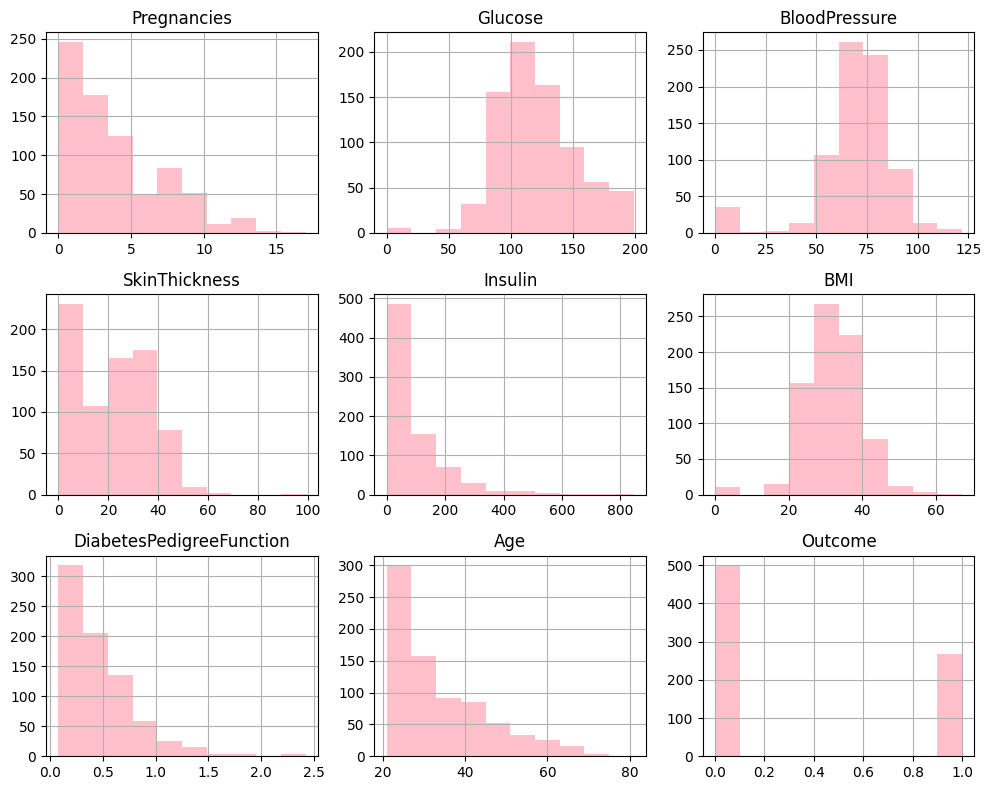

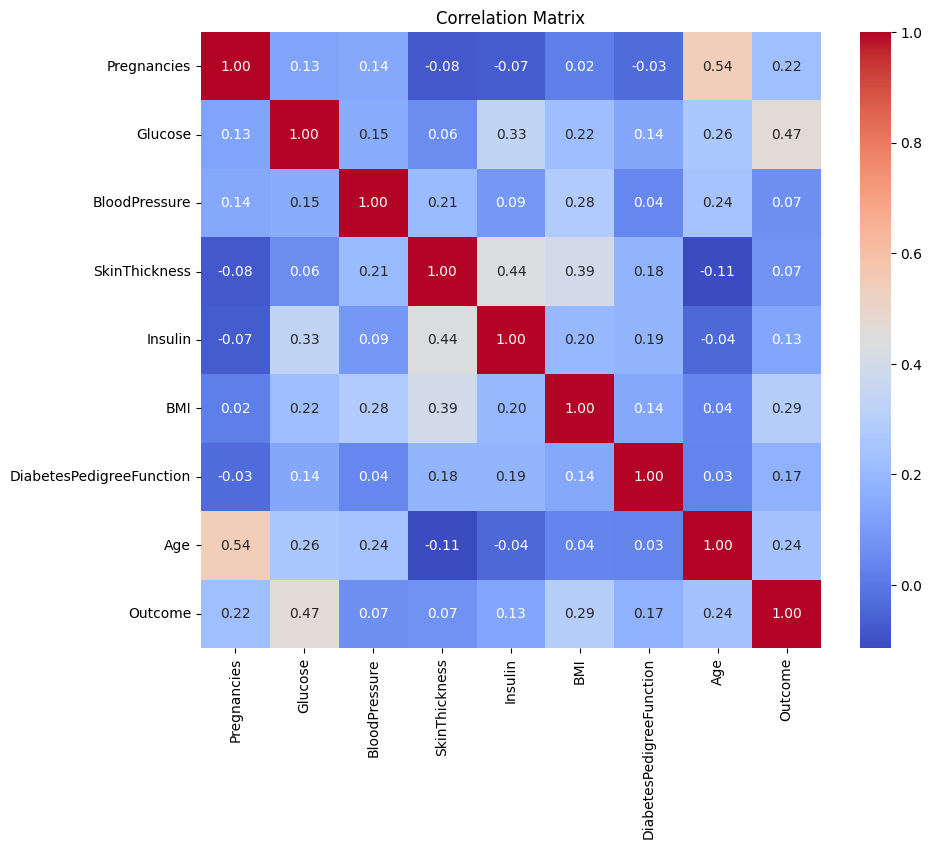

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


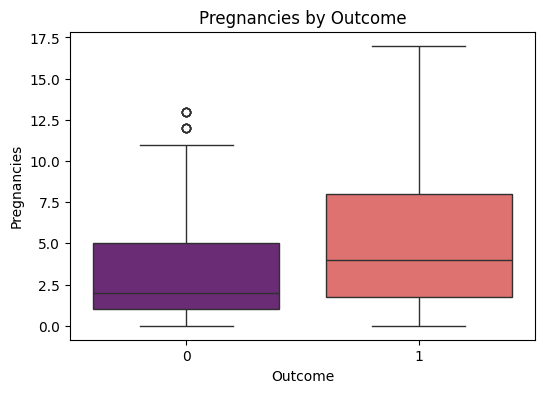

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


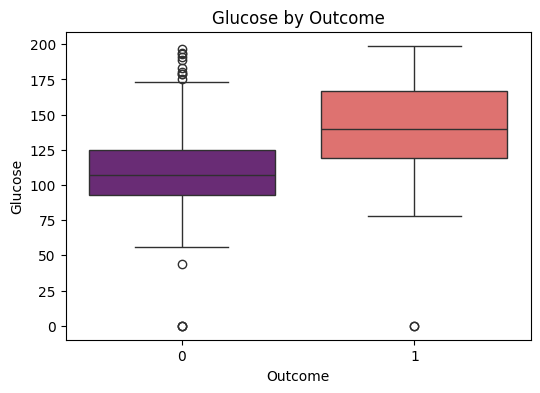

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


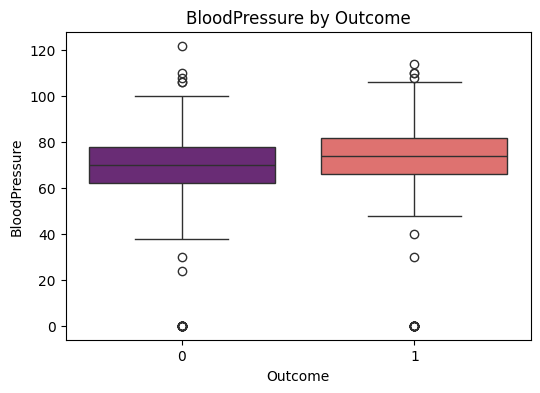

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


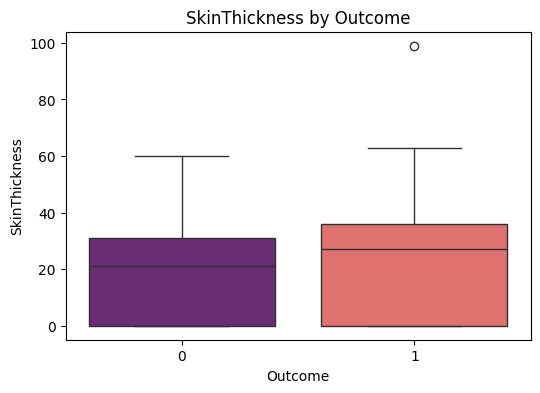

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


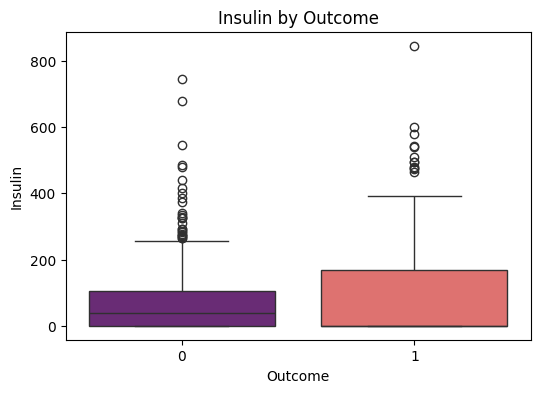

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


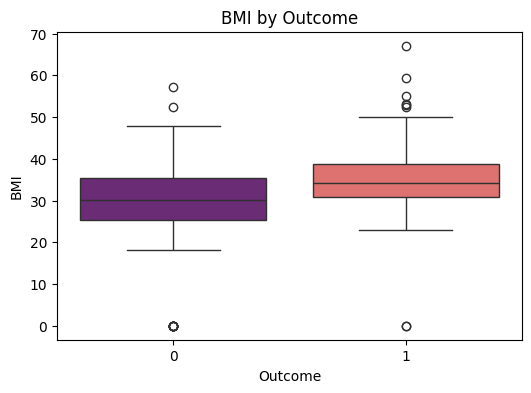

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


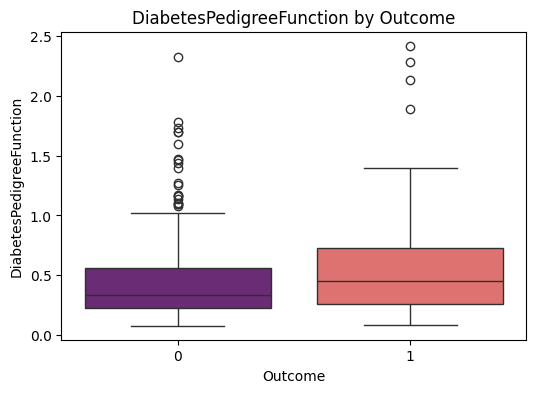

<ipython-input-40-a809176dbe05>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='magma')


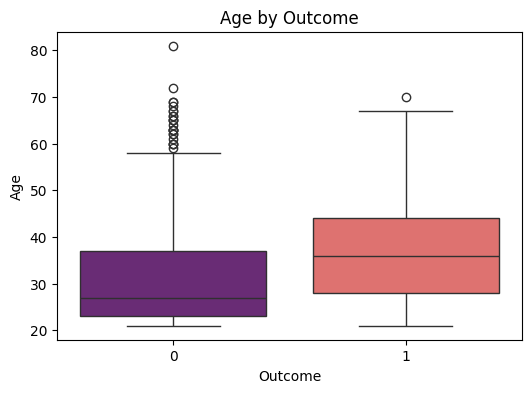

In [40]:
# prompt: plot a graph of dataset

import matplotlib.pyplot as plt
# Basic distribution plots for some columns
df.hist(figsize=(10, 8), color='pink')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for a subset of features (can take time with many features)
# sns.pairplot(df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Outcome']], hue='Outcome')
# plt.show()

# Box plots for each feature by outcome
for col in df.columns[:-1]: # Exclude the 'Outcome' column
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df, palette='magma')
    plt.title(f'{col} by Outcome')
    plt.show()

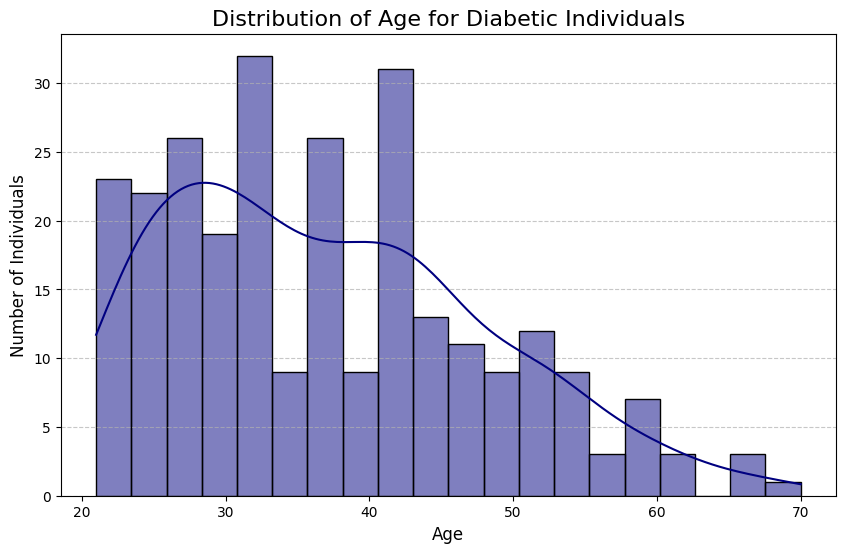

In [30]:
# prompt: create a clean  graph of diabetic person according to age

import matplotlib.pyplot as plt
# Filter the data to include only diabetic persons (Outcome = 1)
diabetic_df = df[df['Outcome'] == 1]

# Create a histogram for the age of diabetic persons
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='Age', bins=20, kde=True, color='navy')
plt.title('Distribution of Age for Diabetic Individuals', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
print(X_train.columns)


Index(['Age', 'BMI', 'Pregnancies', 'BloodPressure', 'Glucose'], dtype='object')


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and clean dataset
df = pd.read_csv("diabetes.csv")
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

# Define X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Save the column order used in training
expected_columns = X.columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function for user input and prediction
def predict_diabetes_for_individual(model):
    print("\nEnter the following medical information:")

    try:
        user_input = [
            float(input("Pregnancies: ")),
            float(input("Glucose: ")),
            float(input("BloodPressure: ")),
            float(input("SkinThickness: ")),
            float(input("Insulin: ")),
            float(input("BMI: ")),
            float(input("DiabetesPedigreeFunction: ")),
            float(input("Age: "))
        ]
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return

    input_df = pd.DataFrame([user_input], columns=expected_columns)

    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    if prediction[0] == 1:
        print("\n🔴 Prediction: The individual is likely diabetic.")
    else:
        print("\n🟢 Prediction: The individual is likely not diabetic.")

    print(f"📊 Probability of being diabetic: {prediction_proba[0]:.4f}")

# Call the prediction function
predict_diabetes_for_individual(model)

from sklearn.metrics import mean_squared_error

# Get predicted probabilities for the positive class (diabetic = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate MSE between predicted probabilities and true labels
mse = mean_squared_error(y_test, y_pred_proba)

print(f"\n📉 Mean Squared Error (MSE): {mse:.4f}")



Enter the following medical information:
Pregnancies: 6
Glucose: 150
BloodPressure: 78
SkinThickness: 52
Insulin: 1
BMI: 23
DiabetesPedigreeFunction: .62
Age: 20

🟢 Prediction: The individual is likely not diabetic.
📊 Probability of being diabetic: 0.3900

📉 Mean Squared Error (MSE): 0.1700
